In [25]:
import re

import googletrans
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter
import tqdm as notebook_tqdm
from googletrans import Translator
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import \
    StopWordRemoverFactory
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

analyser = SentimentIntensityAnalyzer()

In [26]:
# Creating list to append tweet data to

tweets_list2 = []

# Using snscrape to get twitter content in indonesian

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('sicepat tokopedia lang:id since:2022-08-01 until:2022-09-30').get_items()):
        tweets_list2.append([tweet.content])

In [27]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Tweets'])

# Display first 5 entries from dataframe
tweets_df2.head()

,Tweets
0,@sicepat_ekspres @TokopediaCare si cepat dan t...
1,"tokopedia lagi ada promo menarik, cuma masih t..."
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...
3,Dear @sicepat_ekspres @tokopedia saya mau komp...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...


In [28]:
tweets_df2.shape

(519, 1)

In [29]:
# removing link, symbol, and emoji. making new table remove_http

def remove(text):
   text = ' ' .join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
   return text
tweets_df2['remove_http'] = tweets_df2['Tweets'].apply(lambda x: remove(x))
tweets_df2.head()

,Tweets,remove_http
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...


In [30]:
# removing hashtag and RT from remove_http and making new column remove_hashtag

def remov(tweet):
   tweet = re.sub(r'\$\w*', '', tweet)
   tweet = re.sub(r'^RT[\s]+', '', tweet)
   tweet = re.sub(r'#', '', tweet)
   tweet = re.sub('[0-9]+', '', tweet)
   tweet = re.sub('@[A-Za-z0-9_]+', '', tweet) #removes @mentions
   return tweet
tweets_df2['remove_hashtag'] = tweets_df2['remove_http'].apply(lambda x: remov(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...


In [31]:
# remove duplicate

tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...


In [32]:
# check column 

tweets_df2.shape

(516, 3)

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiyeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# print indonesian stopwords and add more stopwords

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'kpd', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'dpt', 'dr', 'kpn',
    'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'gak', 'km', 'eh', 'sih',
    'bang', 'bro', 'sob', 'mas', 'mba', 'haha', 'wkwk', 'kmrn', 'iy', 'affa',
    'iyah', 'lho', 'sbnry', 'tuh', 'kzl', 'hahaha', 'weh', 'tuh', 'sicepat', 'cepat', 'tokopedia','ekspres','si', 'nggak','dong','id','ID'
]
data = stop_factory + more_stopwords
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [35]:
# stemming using sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import string
from nltk.tokenize import TweetTokenizer
happy_emoticons = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':x', ':>', '=]', '8)',
    ':-D', ':D', ':^)', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D',
    '=D', '=-3', ':-))', ':-)', "-')", ':*', ':^*', '>:P', ':-P', ':P',
    'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)',
    '>:-)', '<3'
])
sad_emoticons = set([
    ':L', ':-/', '>:/', ':$', '>:[', ':@', ':-(', ':[', ':-||', '=L',
    ':<', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'(", ':\\', ':-c',
    ':c', ':(', '>:\\', ':('
])
all_emoticons = happy_emoticons.union(sad_emoticons)
def clean_tweets(tweet):
   tokenizer = TweetTokenizer(preserve_case=False,  
                             strip_handles=True,
                             reduce_len=True)
   tweet_tokens = tokenizer.tokenize(tweet)
   tweet_clean = []
   for word in tweet_tokens:
      if(word not in data and
         word not in all_emoticons and
         word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweet_clean.append(stem_word) 
  
   return tweet_clean

In [36]:
# applying stemming function

tweets_df2['Tweet'] = tweets_df2['remove_hashtag'].apply(lambda x: clean_tweets(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...,"[paket, ngga, gerak, padahal, guna, layan, bes..."
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...,"[promo, tarik, cuma, trauma, tbtb, dapetnya, p..."
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada,"[fitur, paling, jelek, pernah]"
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...,"[dear, mau, komplain, beli, barang, tokped, dg..."
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...,"[pilih, kurir, udah, dimatiin, aja, dapet, kur..."


In [37]:
# join the sentences in tweet

def remove_punct(text):
   text = " ".join([char for char in text if char not in string.punctuation])
   return text

In [38]:
# applying previous function

tweets_df2['Tweet'] = tweets_df2['Tweet'].apply(lambda x: remove_punct(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...,paket ngga gerak padahal guna layan best harus...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...,promo tarik cuma trauma tbtb dapetnya pake argh
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada,fitur paling jelek pernah
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...,dear mau komplain beli barang tokped dg eksped...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...,pilih kurir udah dimatiin aja dapet kurir tela...


In [39]:
# remove blank tweet (optional)

tweets_df2 = tweets_df2[tweets_df2['Tweet'] != '']
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...,paket ngga gerak padahal guna layan best harus...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...,promo tarik cuma trauma tbtb dapetnya pake argh
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada,fitur paling jelek pernah
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...,dear mau komplain beli barang tokped dg eksped...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...,pilih kurir udah dimatiin aja dapet kurir tela...


In [40]:
#sorted index 

tweets_df2 = tweets_df2.reset_index(drop=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...,paket ngga gerak padahal guna layan best harus...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...,promo tarik cuma trauma tbtb dapetnya pake argh
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada,fitur paling jelek pernah
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...,dear mau komplain beli barang tokped dg eksped...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...,pilih kurir udah dimatiin aja dapet kurir tela...


In [41]:
# showed clean data

tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head(10)

,Tweets,remove_http,remove_hashtag,Tweet
0,@sicepat_ekspres @TokopediaCare si cepat dan t...,ekspres si cepat dan tokopedia tolong dong pak...,ekspres si cepat dan tokopedia tolong dong pak...,paket ngga gerak padahal guna layan best harus...
1,"tokopedia lagi ada promo menarik, cuma masih t...",tokopedia lagi ada promo menarik cuma masih tr...,tokopedia lagi ada promo menarik cuma masih tr...,promo tarik cuma trauma tbtb dapetnya pake argh
2,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Fitur paling jelek yang pernah ada,ekspres Fitur paling jelek yang pernah ada,fitur paling jelek pernah
3,Dear @sicepat_ekspres @tokopedia saya mau komp...,Dear ekspres saya mau komplain saya beli baran...,Dear ekspres saya mau komplain saya beli baran...,dear mau komplain beli barang tokped dg eksped...
4,Pilihan kurir @sicepat_ekspres di @TokopediaCa...,Pilihan kurir ekspres di udah dimatiin masih a...,Pilihan kurir ekspres di udah dimatiin masih a...,pilih kurir udah dimatiin aja dapet kurir tela...
5,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres id gmn kurir rekomendasi nya Kok makin...,ekspres id gmn kurir rekomendasi nya Kok makin...,gmn kurir rekomendasi makin parah paket gerak
6,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres id gmn nih,ekspres id gmn nih,gmn
7,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Kukira saya saja ternyata sama ya bera...,ekspres Kukira saya saja ternyata sama ya bera...,kira nyata sama arti emang lawak tokopedianya
8,@ashrafrdaus @JNECare @tokopedia @sicepat_eksp...,ekspres Saya pake prioritas juga sama aja Mala...,ekspres Saya pake prioritas juga sama aja Mala...,pake prioritas sama aja malah lebih lambat gar...
9,@TokopediaCare @sicepat_ekspres kurir Sicepat ...,ekspres kurir Sicepat sangat lelet bikin buruk...,ekspres kurir Sicepat sangat lelet bikin buruk...,kurir sangat lelet bikin buruk citra ulang kas...


In [42]:
# remove column except Tweets

tweets_df2.drop(tweets_df2.columns[[0, 1, 2]], axis=1, inplace=True)
tweets_df2.head()

,Tweet
0,paket ngga gerak padahal guna layan best harus...
1,promo tarik cuma trauma tbtb dapetnya pake argh
2,fitur paling jelek pernah
3,dear mau komplain beli barang tokped dg eksped...
4,pilih kurir udah dimatiin aja dapet kurir tela...


In [43]:
# import to csv

tweets_df2.to_csv('clean_tokped.csv', encoding='utf8', index=False)

In [44]:
# read csv

df = pd.read_csv('clean_tokped.csv')
df.head()

,Tweet
0,paket ngga gerak padahal guna layan best harus...
1,promo tarik cuma trauma tbtb dapetnya pake argh
2,fitur paling jelek pernah
3,dear mau komplain beli barang tokped dg eksped...
4,pilih kurir udah dimatiin aja dapet kurir tela...


In [45]:
# translate indonesian text to english

translator = Translator()
translations = {}
for column in df.columns:
   unique_elements = df[column].unique()
   for element in unique_elements:
      translations[element] = translator.translate(element).text
translations

{'paket ngga gerak padahal guna layan best harus hari sampe sekarang ngga gera': "The package didn't move even though to use the best service it had to arrive today and it didn't arrive",
 'promo tarik cuma trauma tbtb dapetnya pake argh': 'promo pull only trauma tbtb got it using argh',
 'fitur paling jelek pernah': 'ugliest feature ever',
 'dear mau komplain beli barang tokped dg ekspedisi nah betul terima ayah rumah terus barang ambil sama kurir kata salah alamat pdhl jelas alamat bener': "Dear, I want to complain about buying Tokped goods with an expedition, right, thank you, father, go home, take the goods from the courier, said the wrong address, but it's clear that the address is correct",
 'pilih kurir udah dimatiin aja dapet kurir telat dapet rating jelek kan seller heran kurir banyak masalah gin aja dipake': 'choose the courier, just turn it off, get the courier late, get a bad rating, right, the seller is surprised the courier has a lot of problems just using it',
 'gmn kuri

In [46]:
# replace translation to Tweet column

df.replace(translations, inplace=True)
df.head(10)

,Tweet
0,The package didn't move even though to use the...
1,promo pull only trauma tbtb got it using argh
2,ugliest feature ever
3,"Dear, I want to complain about buying Tokped g..."
4,"choose the courier, just turn it off, get the ..."
5,"what about the recommended courier, the worse ..."
6,How
7,"I think it's real and it means it's a joke, To..."
8,use the same priority instead it's slower beca...
9,"the courier is very slow, makes a bad image, r..."


In [47]:
# export to csv

df.to_csv('translation_tokped.csv', encoding='utf8', index=False)

In [48]:
# checking the data

def load_data():
   data = pd.read_csv('translation_tokped.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet
0,The package didn't move even though to use the...
1,promo pull only trauma tbtb got it using argh
2,ugliest feature ever
3,"Dear, I want to complain about buying Tokped g..."
4,"choose the courier, just turn it off, get the ..."


In [49]:
# calculate polarity

scores = [analyser.polarity_scores(x) for x in tweet_df['Tweet']]
scores

[{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6369},
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215},
 {'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5859},
 {'neg': 0.091, 'neu': 0.716, 'pos': 0.193, 'compound': 0.5106},
 {'neg': 0.177, 'neu': 0.769, 'pos': 0.054, 'compound': -0.6486},
 {'neg': 0.24, 'neu': 0.62, 'pos': 0.14, 'compound': -0.3182},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.296},
 {'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.7005},
 {'neg': 0.098, 'neu': 0.756, 'pos': 0.146, 'compound': 0.1779},
 {'neg': 0.055, 'neu': 0.836, 'pos': 0.109, 'compound': 0.3134},
 {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.5106},
 {'neg': 0.218, 'neu': 0.565, 'pos': 0.218, 'compound': 0.0},
 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.4767}

In [50]:
# make the result column

tweet_df['Compound_Score'] = [x['compound'] for x in scores]
tweet_df.head()

,Tweet,Compound_Score
0,The package didn't move even though to use the...,0.6369
1,promo pull only trauma tbtb got it using argh,-0.4215
2,ugliest feature ever,-0.5859
3,"Dear, I want to complain about buying Tokped g...",0.5106
4,"choose the courier, just turn it off, get the ...",-0.6486


In [51]:
# add sentiments

tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negative'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Neutral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positive'
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,The package didn't move even though to use the...,0.6369,Positive
1,promo pull only trauma tbtb got it using argh,-0.4215,Negative
2,ugliest feature ever,-0.5859,Negative
3,"Dear, I want to complain about buying Tokped g...",0.5106,Positive
4,"choose the courier, just turn it off, get the ...",-0.6486,Negative


In [52]:
# export csv

tweet_df.to_csv('classification_tokped_sentiment.csv', encoding='utf8', index=False)

In [53]:
def load_data():
   data = pd.read_csv('classification_tokped_sentiment.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,The package didn't move even though to use the...,0.6369,Positive
1,promo pull only trauma tbtb got it using argh,-0.4215,Negative
2,ugliest feature ever,-0.5859,Negative
3,"Dear, I want to complain about buying Tokped g...",0.5106,Positive
4,"choose the courier, just turn it off, get the ...",-0.6486,Negative


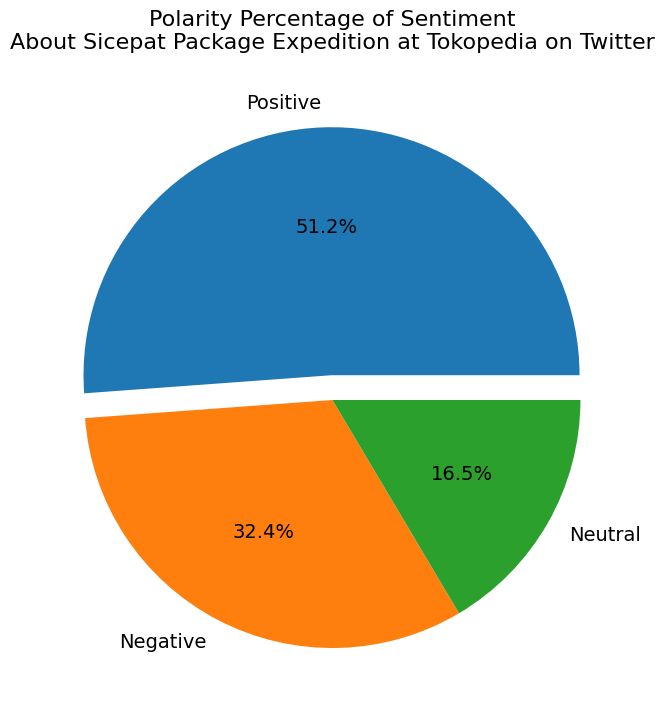

<Figure size 640x480 with 0 Axes>

In [54]:
# visualization pie chart

fig, ax = plt.subplots(figsize = (8, 10))
sizes = [count for count in tweet_df['Sentiments'].value_counts()]
labels = list(tweet_df['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Polarity Percentage of Sentiment\nAbout Sicepat Package Expedition at Tokopedia on Twitter', fontsize = 16, pad = 30)
fig.set_facecolor('white')
plt.show()
plt.savefig('pie_chart.png')

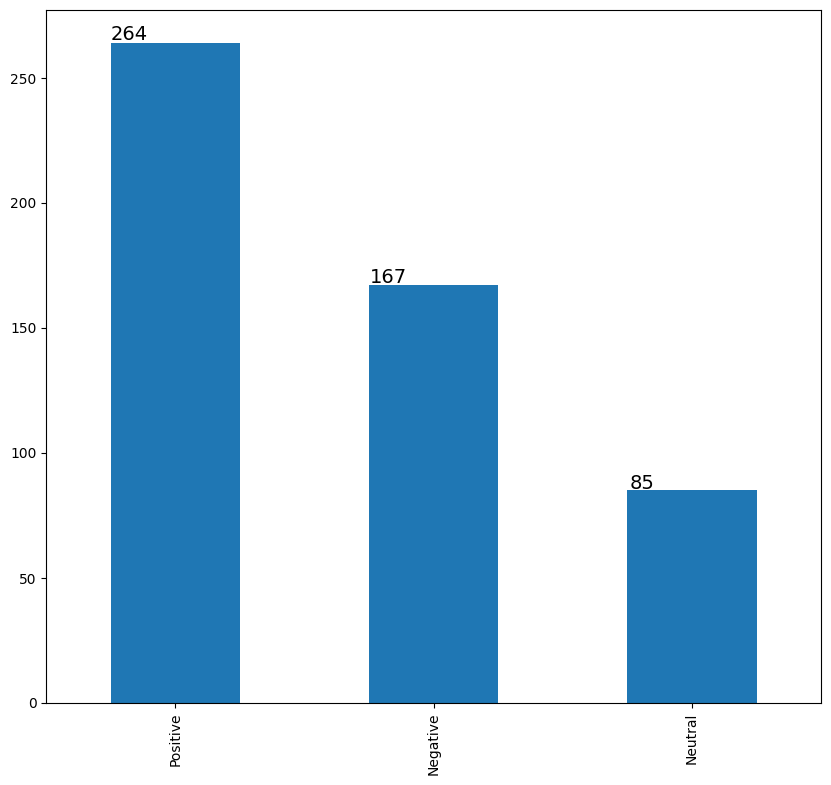

<Figure size 640x480 with 0 Axes>

In [55]:
# visualization plot bar

s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.show()
plt.savefig('bar_chart.png')

In [56]:
# calculate sentiment total

negative_sentiment = (tweet_df['Sentiments'] == 'Negative').sum()
print("The number of negative sentiments is:\t", negative_sentiment)
positive_sentiment = (tweet_df['Sentiments'] == 'Positive').sum()
print("The number of positive sentiments is:\t", positive_sentiment)
neutral_sentiment = (tweet_df['Sentiments'] == 'Neutral').sum()
print("The number of neutral sentiments is:\t", neutral_sentiment)
total = len(tweet_df.index)
print("The overall total of sentiments is:\t", total)

The number of negative sentiments is:	 167
The number of positive sentiments is:	 264
The number of neutral sentiments is:	 85
The overall total of sentiments is:	 516


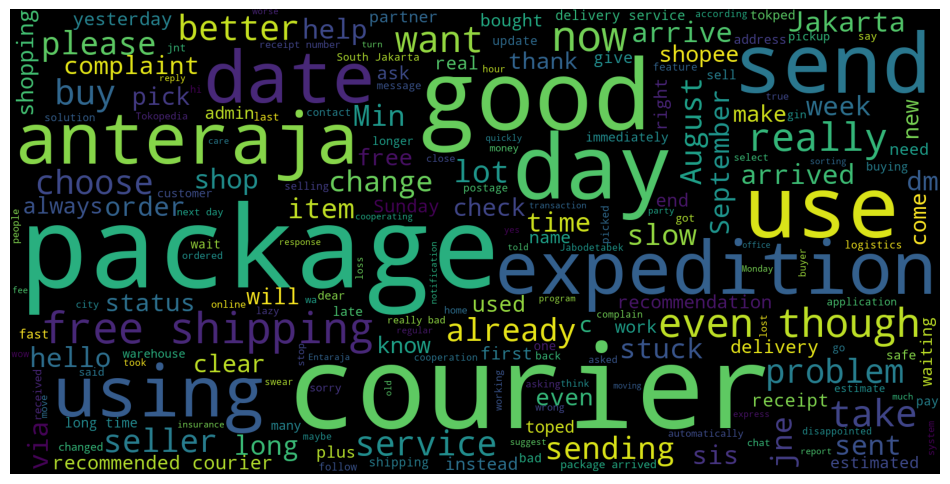

<Figure size 640x480 with 0 Axes>

In [57]:
# make wordcloud

text = " ".join(tweet for tweet in tweet_df['Tweet'])
word_cloud = WordCloud(width=1600, height=800, max_font_size=200,
                       background_color='black').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')